In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import math as m
import numpy.linalg as la
import scipy.linalg as sla
import csv
import matplotlib 

#Problem 3a
muE = 3.986*10**5 #km^3/s^2
rE = 6371.0 #km
m = 2000 #kg

rvec = np.array([-4213.528, 6460.93, -528.089]) #km
vvec = np.array([-3.74, -2.58, -5.714]) #km/s

#####r,v to COE#####
print(      )

hvec = np.cross(rvec,vvec) #cross product func
print("angular vel vec=", hvec)

kvec = np.array([0,0,1])
nvec = np.cross(kvec,hvec) #n cross k func
nmag = np.linalg.norm(nvec)
print("nmag =", nmag)
print("Normal Vec =", nvec)

vmag = np.linalg.norm(vvec) #magnitude of vvec
rmag = np.linalg.norm(rvec) #magnitude of rvec

print("rmag =",rmag)
print("vmag =", vmag)

evec = 1/muE * ((vmag**2 - muE/rmag)*rvec - (rvec@vvec)*vvec)
emag = np.linalg.norm(evec)

print("eccentricity vec =", evec)
print("eccentricity mag =", emag)
print(      )

P = (np.linalg.norm(hvec)**2)/muE
a = P/(1-emag**2)

print("a =",a)
print(    )

## take h,n,e vectors and find OMEGA, w, i
h_k = np.linalg.norm(kvec@hvec)
hmag = np.linalg.norm(hvec)
i = np.arccos(h_k/hmag)
print("angle of inclination (i) =",i * 180/(np.pi))

I = [1,0,0] #i direction

if nvec[1]>0:
    OMEGA = np.arccos(nvec[0]/nmag) 
else:
    OMEGA = 2*np.pi - np.arccos(nvec[0]/nmag)

print("OMEGA angle =", OMEGA * 180/np.pi)

ndot = np.dot(nvec,evec)
emag = np.linalg.norm(evec)

if evec[2]>0:
    w = np.arccos(ndot/(nmag*emag))
else: 
    w = 2*np.pi - np.arccos(ndot/(nmag*emag))
print("argument of periapsis (w) =", w * 180/np.pi)

e_f = evec@rvec
if np.dot(rvec,vvec) > 0:
    f = np.arccos(e_f/(emag*np.linalg.norm(rvec)))
else:
    f = 2*m.pi - np.arccos(e_f/(emag*np.linalg.norm(rvec)))
print("True anomaly at epoch (f) =",f * 180/np.pi)



angular vel vec= [-38280.22364  -22101.046132  35034.78044 ]
nmag = 44202.16920081194
Normal Vec = [ 22101.046132 -38280.22364       0.      ]
rmag = 7731.514254245736
vmag = 7.300259995370028
eccentricity vec = [0.00139061 0.04181771 0.02789936]
eccentricity mag = 0.050289456327316635

a = 8001.338486786877

angle of inclination (i) = 51.59954396480777
OMEGA angle = 299.9999424225426
argument of periapsis (w) = 134.93543434606022
True anomaly at epoch (f) = 50.064601097426


In [13]:
#3b
deltaV1 = 1.88 #km/s
deltaV2 = 1.362 #km/s

P = (np.linalg.norm(hvec)**2)/muE
rp = P/(1+emag) 

print("P =", P)
print("rp =", rp)
print("a =", a)


#time of flight

r2 = 2.915839822786373*10**4

Tof = np.pi*np.sqrt((((rp+r2)/2)**3)/muE)
print("Time of flight =", Tof/3600)

tof = np.pi*np.sqrt(((a)**3)/muE)
print("Time of flight 2 =", tof/3600)

TOFTOT = Tof+tof

print("total time of flight =", TOFTOT/3600)

P = 7981.102866372841
rp = 7598.955524395531
a = 8001.338486786877
Time of flight = 3.443896477353101
Time of flight 2 = 0.9892878820899356
total time of flight = 4.433184359443037


In [24]:
#3c
deltaV1 = 1.88*1000 #km/s to m/s
deltaV2 = 1.362 *1000 #km/s to m/s

g = 9.81
m0 = 2000
mf1 = m0 - 881.33

ISP1 = deltaV1/(g*np.log(m0/mf1))
print(ISP1)

mf2 = mf1 - 291.45
ISP2 = deltaV2/(g*np.log(mf1/mf2))
print(ISP2)

PI = 0.05
mstar = PI*m0

ms = m0-881.33-291.45-mstar
E = ms/(ms+881.33+291.45)
print(E)
print(ms)

329.8433256852149
459.9946490813231
0.3827473684210526
727.22


In [4]:
#3d
I1 = 140
I2 = 130
I3 = 20
w1 = 0.2
w2 = 0.1
w3 = 0.1

w1vec = np.array([0,0,w1])
w2vec = np.array([0,0,w2])
w3vec = np.array([0,0,w3])

I = np.array([[I1,0,0],[0,I2,0],[0,0,I3]])


t1 = np.dot((0.5*w1vec),(I*w1vec))
t2 = np.dot((0.5*w2vec),(I*w2vec))
t3 = np.dot((0.5*w3vec),(I*w3vec))

print(t1)
print(t2)
print(t3)
t = t1+t2+t3
print(t)
print(np.linalg.norm(t))


[0.  0.  0.4]
[0.  0.  0.1]
[0.  0.  0.1]
[0.  0.  0.6]
0.6


neutral point =  0.6993827160493828
distance of cog to neutral point = 1.1111111111111116  ft
1.9181988742964353
0.0324378368979308
0.4771604938271605


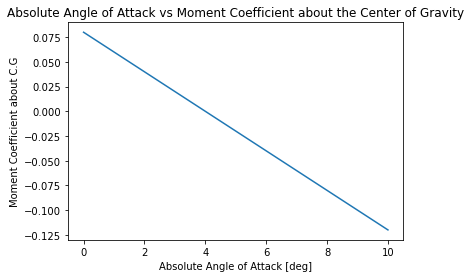

In [28]:
#Problem 4

import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import math as m
import numpy.linalg as la
import scipy.linalg as sla
import csv
import matplotlib

cm0 = 0.08
Sref = 53.3
St = 14.2
c = 5
lt = 36
it = 0
E0 = 1.8
dEda = 0.35
a = 0.09
Cmacwb = -0.032
alpha = 4
hacwb = 0.25


Vh = lt*St/(Sref*c)
at = (cm0 - Cmacwb)/(Vh*(it + E0))
h = (-Cmacwb - Vh*at*(it + E0))/(a*alpha) + Vh*(at/a)*(1 - dEda) + hacwb
hn = hacwb + Vh*(at/a)*(1 - dEda)

print("neutral point = ", hn)
print("distance of cog to neutral point =", c*(hn - h), " ft")

def cmcg(alpha):
    cmcg = Cmacwb + a*alpha*(h - hacwb - Vh*(at/a)*(1 - dEda)) + Vh*at*(it + E0)
    return cmcg

abs_alpha = np.linspace(0, 10, 50)
coefmoment = []
for i in abs_alpha:
    coefmoment.append(cmcg(i))

plt.plot(abs_alphas, coefmoment)
plt.title("Absolute Angle of Attack vs Moment Coefficient about the Center of Gravity")
plt.xlabel("Absolute Angle of Attack [deg]")
plt.ylabel("Moment Coefficient about C.G")
print(Vh)
print(at)
print(h)

2